In [1]:
import matplotlib.pyplot as plt
import supy as sp
import pandas as pd
import numpy as np
from time import time
#sp.show_version()

# praktiskt om man vill kunna se alla kolumner och rader i en dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Sätt Path till runcontrol. Flera runcontrol kan användas om du t.ex. har olika forcing data.
#path_runcontrol = "/Users/juliacederbrant/Handledning_Julia/RunControl.nml"
path_runcontrol = "/Volumes/NO NAME/masterarbete/SuPy/input_data/RunControl.nml"
path_runcontrol

siteselect = pd.read_csv("/Volumes/NO NAME/masterarbete/SuPy/input_data/Input/SUEWS_SiteSelect.txt",        
        delim_whitespace=True,
        error_bad_lines=False,
        header= 1,
        index_col=0,)

#siteselect

# Ladda in inställningarna i runcontrol och SiteSelect i SuPy som en DataFrame
df_state_init = sp.init_supy(path_runcontrol)

#df_state_init.loc[1]

# Grid df_state_init, se ovan. Fler Grids kan användas
grid = df_state_init.index[0] 


forcing_2017 = pd.read_csv("/Volumes/NO NAME/masterarbete/SuPy/input_data/Input/Kb_2017_data_60.txt",        
        delim_whitespace=True,
        error_bad_lines=False,
        header= 0,
        index_col=0)

#forcing_2018

forcing_2018 = pd.read_csv("/Volumes/NO NAME/masterarbete/SuPy/input_data/Input/Kb_2018_data_60.txt",        
        delim_whitespace=True,
        error_bad_lines=False,
        header= 0,
        index_col=0)

#forcing_2018

#sp.load_forcing_grid sätter Datetime som index på forcing data, samst läser in all forcing data!

df_forcing = sp.load_forcing_grid(path_runcontrol, grid)

#sp.check för kolla så att forcing funkar
sp.check_forcing(df_forcing)
#df_forcing

2021-03-10 14:02:11,941 - SuPy - INFO - All cache cleared.
2021-03-10 14:02:14,925 - SuPy - INFO - All cache cleared.
2021-03-10 14:02:19,678 - SuPy - INFO - SuPy is validating `df_forcing`...
2021-03-10 14:02:30,179 - SuPy - INFO - All checks for `df_forcing` passed!


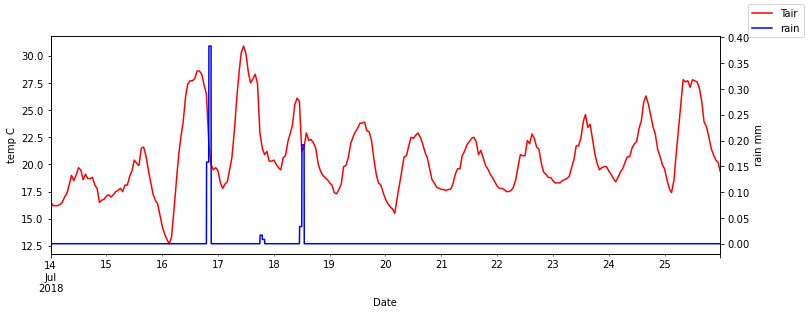

In [2]:
s = '2018 07 14'

e = '2018 07 25'

 

ax = df_forcing.loc[s:e,'Tair'].plot(color='r',figsize=(12,4))
_ = ax.set_xlabel('Date')
_ = ax.set_ylabel('temp C')

ax2 = ax.twinx()

ax2 = df_forcing.loc[s:e,'rain'].plot(ax=ax2, color='b',figsize=(12,4))
_ = ax2.set_ylabel('rain mm')
ax.figure.legend()
plt.show()


In [3]:
df_output, df_state_final = sp.run_supy(df_forcing, df_state_init)

2021-03-10 14:02:50,197 - SuPy - INFO - ====================
2021-03-10 14:02:50,209 - SuPy - INFO - Simulation period:
2021-03-10 14:02:50,214 - SuPy - INFO -   Start: 2016-12-31 23:05:00
2021-03-10 14:02:50,231 - SuPy - INFO -   End: 2018-12-31 23:00:00
2021-03-10 14:02:50,243 - SuPy - INFO - 
2021-03-10 14:02:50,265 - SuPy - INFO - No. of grids: 4
2021-03-10 14:02:50,282 - SuPy - INFO - SuPy is running in parallel mode
2021-03-10 14:06:58,711 - SuPy - INFO - Execution time: 248.5 s
2021-03-10 14:06:58,758 - SuPy - INFO - ====================



In [4]:
df_output_a = df_output.SUEWS.loc[2]

df_output_b = df_output.SUEWS.loc[3]

df_output_c = df_output.SUEWS.loc[4] 

df_output_merge_x=pd.concat([df_output_a, df_output_b, df_output_c],axis=1,join='inner',keys=['a', 'b', 'c']).swaplevel(0,1,axis=1).sort_index(axis=1)

In [5]:
from datetime import date,datetime

def supy_plot(var, df_in, s,e, size=False):

    if size:   
        size=size
    else:
        size = 10, 6

    color1 = ('b', 'g', 'r')
    color2 = ('g', 'r')

    fig, axes = plt.subplots(2, 1, sharex=True)
    a = df_in.loc[s:e,[var]]\
        .plot(ax=axes[0],figsize=(size),title=var, color=color1)

    a.legend(['a', 'b', 'c'])

    b = df_diff_m=pd.concat([df_in.loc[s:e,(var,'b')]-df_in.loc[s:e,(var,'a')],\
        df_in.loc[s:e,(var,'c')]-df_in.loc[s:e,(var,'a')],\
        ],\
        axis=1,join='inner',keys=['b','c']).sort_index(axis=1).\
        plot(ax=axes[1], figsize=(size), title = ('Difference '), color=color2)

    b.legend(['b', 'c'])

    b.axhline(linestyle = '--',color= 'grey',alpha = 0.6)

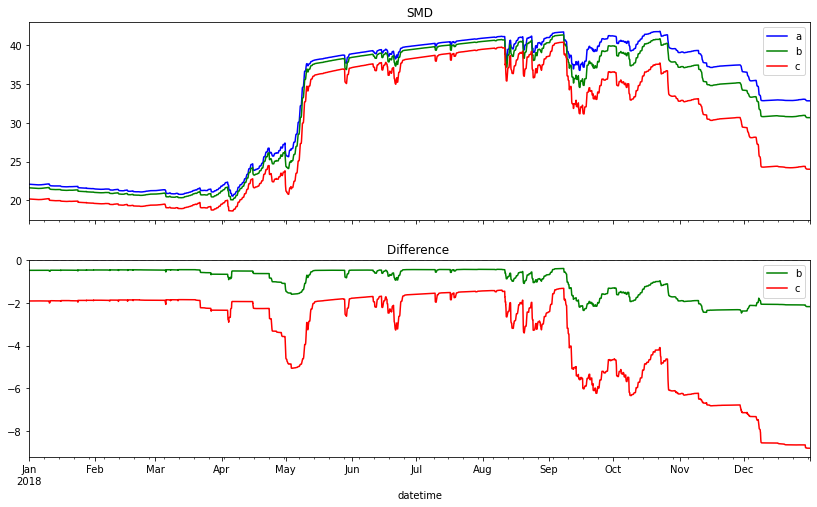

In [6]:
s = '2018'
e = '2018'

supy_plot('SMD', df_output_merge_x, s,e, size=(14,8))

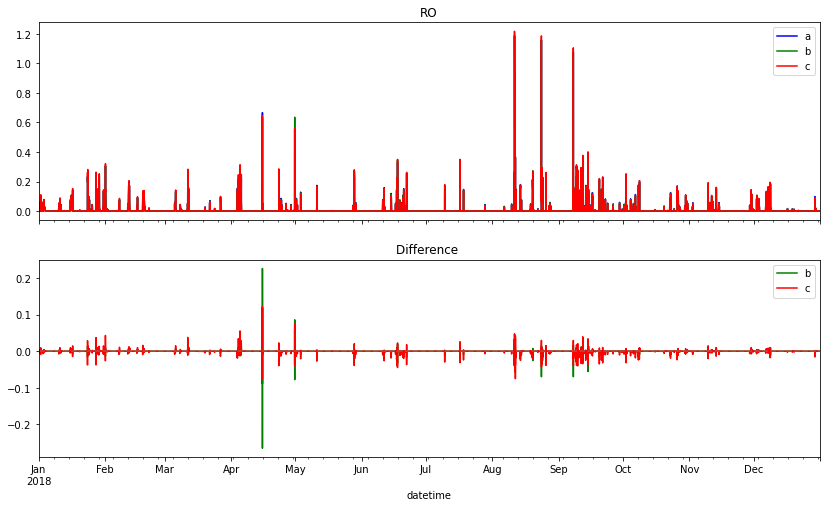

In [7]:
s = '2018'
e = '2018'

supy_plot('RO', df_output_merge_x, s,e, size=(14,8))

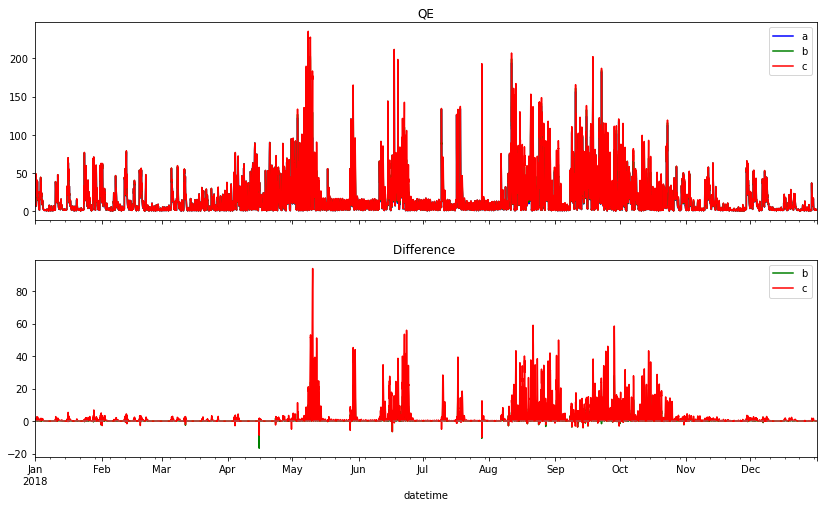

In [8]:
s = '2018'
e = '2018'

supy_plot('QE', df_output_merge_x, s,e, size=(14,8))

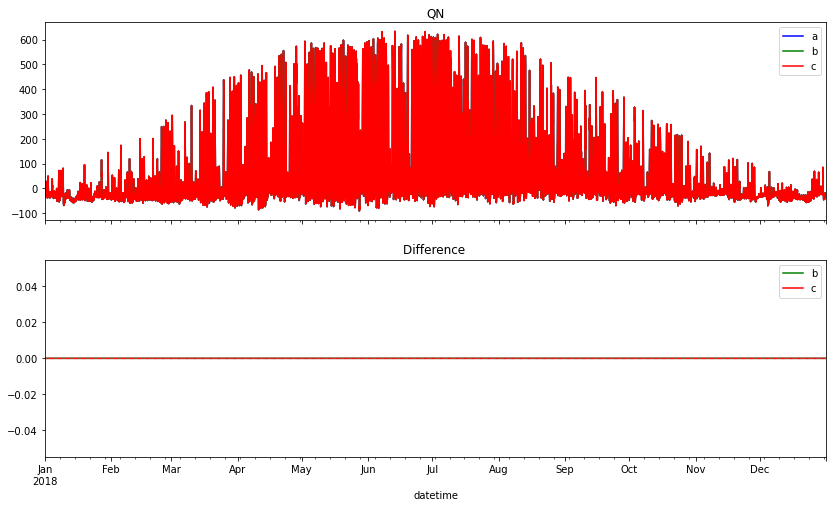

In [9]:
s = '2018'
e = '2018'

supy_plot('QN', df_output_merge_x, s,e, size=(14,8))

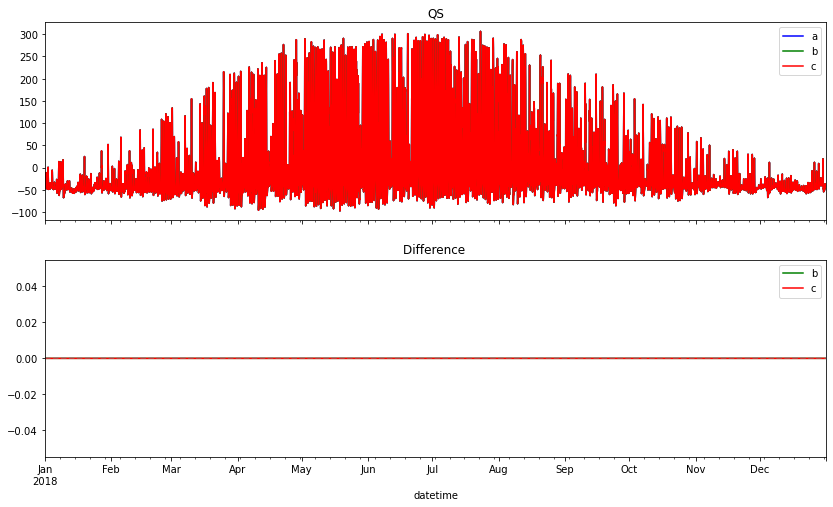

In [12]:
s = '2018'
e = '2018'

supy_plot('QS', df_output_merge_x, s,e, size=(14,8))

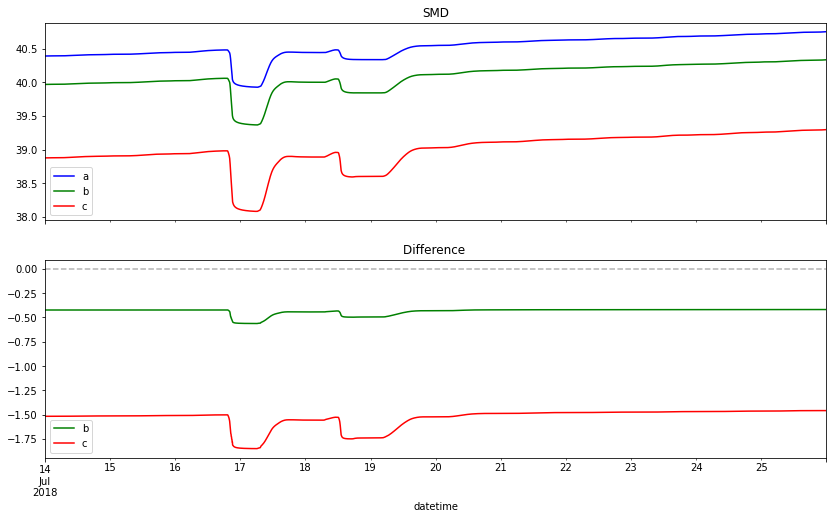

In [13]:
s = '2018 07 14'
e = '2018 07 25'

supy_plot('SMD', df_output_merge_x, s,e, size=(14,8))

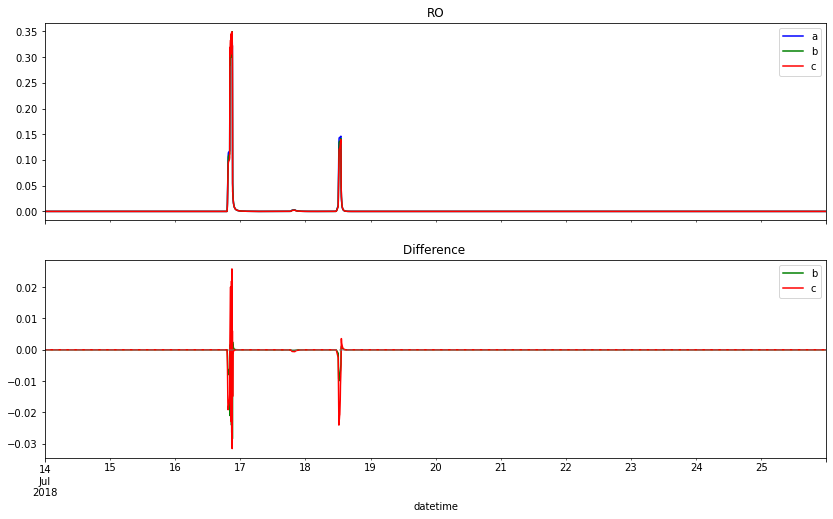

In [14]:
s = '2018 07 14'
e = '2018 07 25'

supy_plot('RO', df_output_merge_x, s,e, size=(14,8))

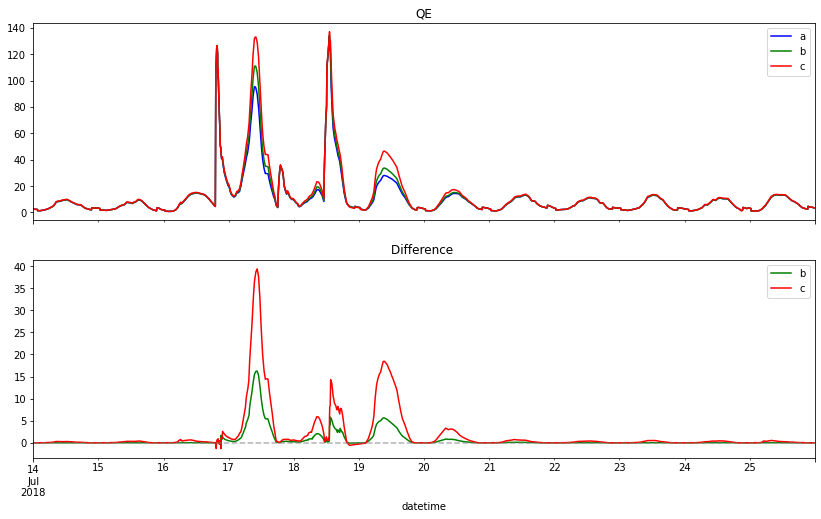

In [15]:
s = '2018 07 14'
e = '2018 07 25'

supy_plot('QE', df_output_merge_x, s,e, size=(14,8))

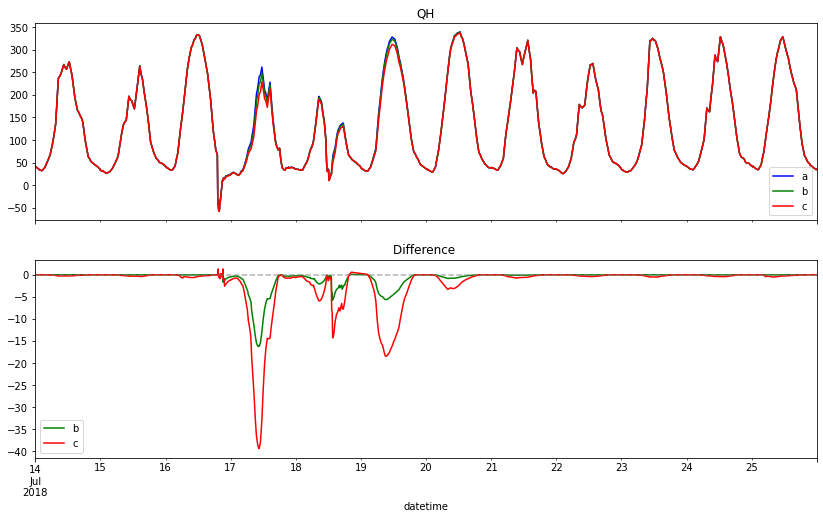

In [16]:
s = '2018 07 14'
e = '2018 07 25'

supy_plot('QH', df_output_merge_x, s,e, size=(14,8))

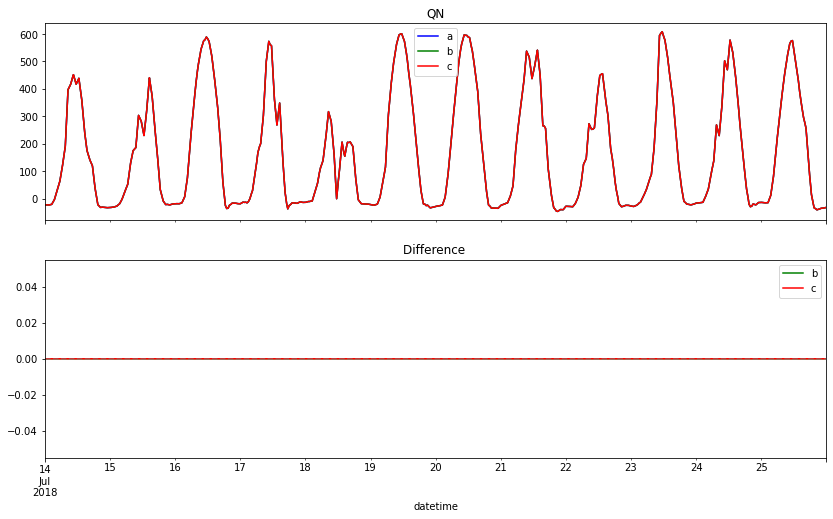

In [17]:
s = '2018 07 14'
e = '2018 07 25'

supy_plot('QN', df_output_merge_x, s,e, size=(14,8))